Single-channel CSC (Constrained Penalty Term)
=============================================

This example demonstrates solving a constrained convolutional sparse coding problem with a greyscale signal

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \left\| \sum_m \mathbf{d}_m * \mathbf{x}_m - \mathbf{s} \right\|_2^2 \; \text{such that} \; \sum_m \| \mathbf{x}_m \|_1 \leq \gamma \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}$ is the input image.

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.admm import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True, gray=True,
                                 idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = signal.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

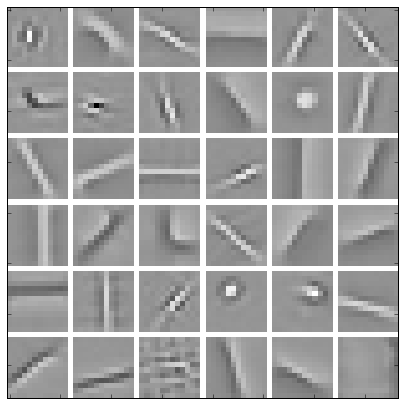

In [4]:
D = util.convdicts()['G:12x12x36']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [admm.cbpdn.ConvBPDNProjL1](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdn.html#sporco.admm.cbpdn.ConvBPDNProjL1) solver options.

In [5]:
gamma = 4.05e2
opt = cbpdn.ConvBPDNProjL1.Options({'Verbose': True, 'MaxMainIter': 250,
                    'HighMemSolve': True, 'LinSolveCheck': False,
                    'RelStopTol': 5e-3, 'AuxVarObj': True, 'rho': 3e0,
                    'AutoRho': {'Enabled': True}})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDNProjL1(D, sh, gamma, opt)
X = b.solve()
print("ConvBPDNProjL1 solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       Cnstr     r         s         ρ       
------------------------------------------------------


   0  2.98e+01  1.19e-09  6.04e-01  8.49e-01  3.00e+00


   1  1.82e+01  0.00e+00  3.74e-01  3.22e-01  3.00e+00


   2  1.37e+01  7.19e-10  2.87e-01  2.05e-01  3.00e+00


   3  1.13e+01  5.54e-10  1.98e-01  1.53e-01  3.55e+00


   4  9.89e+00  0.00e+00  1.47e-01  1.22e-01  4.05e+00


   5  9.01e+00  1.45e-07  1.18e-01  1.03e-01  4.05e+00


   6  8.44e+00  0.00e+00  9.71e-02  8.64e-02  4.05e+00


   7  7.96e+00  1.93e-07  8.05e-02  7.42e-02  4.05e+00


   8  7.57e+00  0.00e+00  6.77e-02  6.54e-02  4.05e+00


   9  7.29e+00  1.07e-09  5.76e-02  5.81e-02  4.05e+00


  10  7.08e+00  0.00e+00  4.96e-02  5.16e-02  4.05e+00


  11  6.90e+00  0.00e+00  4.31e-02  4.64e-02  4.05e+00


  12  6.75e+00  2.19e-07  3.78e-02  4.21e-02  4.05e+00


  13  6.63e+00  3.93e-10  3.35e-02  3.86e-02  4.05e+00


  14  6.53e+00  0.00e+00  2.99e-02  3.55e-02  4.05e+00


  15  6.44e+00  4.48e-07  2.70e-02  3.28e-02  4.05e+00


  16  6.37e+00  0.00e+00  2.60e-02  3.03e-02  3.67e+00


  17  6.30e+00  4.64e-07  2.38e-02  2.80e-02  3.67e+00


  18  6.25e+00  0.00e+00  2.18e-02  2.62e-02  3.67e+00


  19  6.19e+00  0.00e+00  2.13e-02  2.45e-02  3.34e+00


  20  6.15e+00  0.00e+00  1.97e-02  2.28e-02  3.34e+00


  21  6.11e+00  0.00e+00  1.83e-02  2.14e-02  3.34e+00


  22  6.07e+00  0.00e+00  1.70e-02  2.01e-02  3.34e+00


  23  6.04e+00  0.00e+00  1.59e-02  1.90e-02  3.34e+00


  24  6.01e+00  0.00e+00  1.48e-02  1.79e-02  3.34e+00


  25  5.98e+00  2.74e-07  1.48e-02  1.70e-02  3.04e+00


  26  5.96e+00  2.82e-10  1.40e-02  1.60e-02  3.04e+00


  27  5.94e+00  0.00e+00  1.32e-02  1.52e-02  3.04e+00


  28  5.92e+00  0.00e+00  1.24e-02  1.44e-02  3.04e+00


  29  5.91e+00  0.00e+00  1.17e-02  1.37e-02  3.04e+00


  30  5.89e+00  0.00e+00  1.11e-02  1.30e-02  3.04e+00


  31  5.87e+00  0.00e+00  1.05e-02  1.25e-02  3.04e+00


  32  5.86e+00  0.00e+00  9.97e-03  1.19e-02  3.04e+00


  33  5.85e+00  2.60e-10  9.47e-03  1.14e-02  3.04e+00


  34  5.84e+00  6.66e-10  9.57e-03  1.09e-02  2.77e+00


  35  5.83e+00  0.00e+00  9.14e-03  1.04e-02  2.77e+00


  36  5.82e+00  0.00e+00  8.74e-03  1.00e-02  2.77e+00


  37  5.81e+00  0.00e+00  8.36e-03  9.60e-03  2.77e+00


  38  5.80e+00  0.00e+00  7.98e-03  9.24e-03  2.77e+00


  39  5.79e+00  0.00e+00  7.62e-03  8.85e-03  2.77e+00


  40  5.78e+00  0.00e+00  7.30e-03  8.53e-03  2.77e+00


  41  5.78e+00  0.00e+00  7.00e-03  8.20e-03  2.77e+00


  42  5.77e+00  0.00e+00  6.71e-03  7.91e-03  2.77e+00


  43  5.76e+00  0.00e+00  6.43e-03  7.64e-03  2.77e+00


  44  5.76e+00  5.29e-07  6.17e-03  7.37e-03  2.77e+00


  45  5.75e+00  0.00e+00  5.93e-03  7.13e-03  2.77e+00


  46  5.75e+00  0.00e+00  6.08e-03  6.89e-03  2.53e+00


  47  5.74e+00  0.00e+00  5.88e-03  6.64e-03  2.53e+00


  48  5.74e+00  0.00e+00  5.68e-03  6.40e-03  2.53e+00


  49  5.74e+00  0.00e+00  5.47e-03  6.18e-03  2.53e+00


  50  5.73e+00  2.40e-10  5.28e-03  5.97e-03  2.53e+00


  51  5.73e+00  0.00e+00  5.09e-03  5.79e-03  2.53e+00


  52  5.72e+00  0.00e+00  4.91e-03  5.59e-03  2.53e+00


  53  5.72e+00  0.00e+00  4.73e-03  5.40e-03  2.53e+00


  54  5.72e+00  0.00e+00  4.56e-03  5.24e-03  2.53e+00


  55  5.71e+00  0.00e+00  4.40e-03  5.09e-03  2.53e+00


  56  5.71e+00  0.00e+00  4.25e-03  4.94e-03  2.53e+00
------------------------------------------------------
ConvBPDNProjL1 solve time: 29.19s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 37.33dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

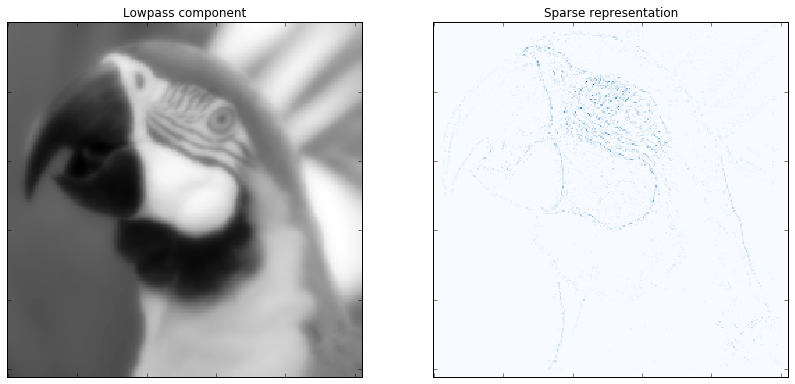

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

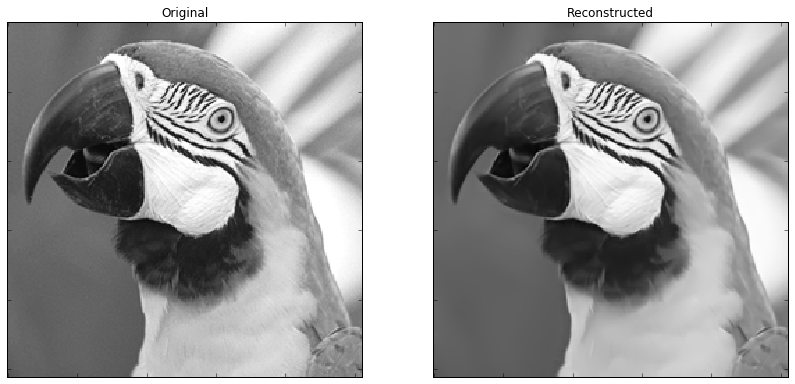

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

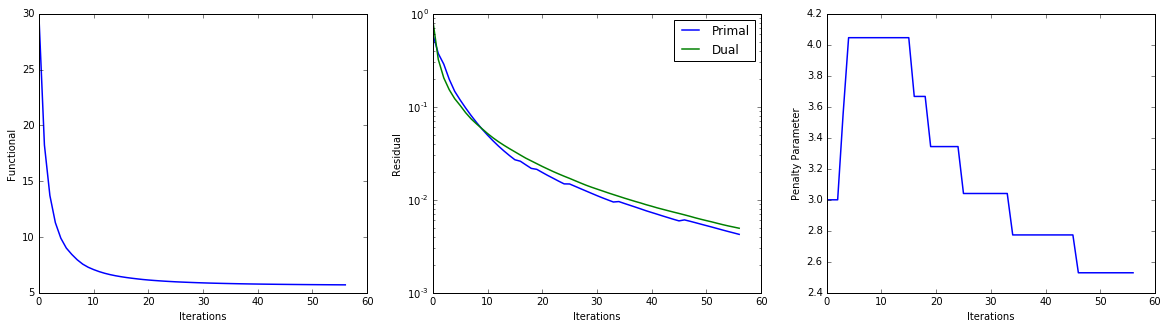

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()